In [5]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [6]:
batch_size = 20

In [7]:
iris = tfds.load('iris', split='train[:90%]', as_supervised=True)
iris_test = tfds.load('iris', split='train[90%:]', as_supervised=True)

def iris2d(features, label):
    return features[2:], tf.cast((label == 0), dtype=tf.float32)

train_generator = (iris.map(iris2d).shuffle(buffer_size=100).batch(batch_size))

test_generator = iris_test.map(iris2d).batch(1)

In [8]:
def linear_model(X, A, b):
    my_output = tf.add(tf.matmul(X, A), b)
    return tf.squeeze(my_output)

In [9]:
def xentropy(y_true, y_pred):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,
                                                                 logits=y_pred))

In [10]:
my_opt = tf.optimizers.SGD(learning_rate=0.02)

In [17]:
tf.random.set_seed(1)

np.random.seed(0)

A = tf.Variable(tf.random.normal(shape=[2, 1]))
b = tf.Variable(tf.random.normal(shape=[1]))
history = list()

for i in range(300):
    iterations_loss = list()
    for features, label in train_generator:
        with tf.GradientTape() as tape:
            predictions = linear_model(features, A, b)
            loss = xentropy(label, predictions)
        iterations_loss.append(loss.numpy())
        gradients = tape.gradient(loss, [A, b])
        my_opt.apply_gradients(zip(gradients, [A, b]))
    history.append(np.mean(iterations_loss))
    
    if (i + 1) % 30 == 0:
        print(f'Step # {i+1} Wights: {A.numpy().T} Biases: {b.numpy()}')
        print(f'Loss = {loss.numpy()}')

Step # 30 Wights: [[-1.1203105  1.2989808]] Biases: [1.0133277]
Loss = 0.47591432929039
Step # 60 Wights: [[-1.1845239  1.0780678]] Biases: [1.5133436]
Loss = 0.28893178701400757
Step # 90 Wights: [[-1.245542    0.89171493]] Biases: [1.9331523]
Loss = 0.3090238571166992
Step # 120 Wights: [[-1.3021222  0.7330702]] Biases: [2.2904475]
Loss = 0.1613316684961319
Step # 150 Wights: [[-1.3546755  0.5964348]] Biases: [2.5980713]
Loss = 0.1737409085035324
Step # 180 Wights: [[-1.4020619  0.4769537]] Biases: [2.8674524]
Loss = 0.17169609665870667
Step # 210 Wights: [[-1.4440237  0.3713711]] Biases: [3.1076746]
Loss = 0.15404179692268372
Step # 240 Wights: [[-1.4868718  0.2757481]] Biases: [3.3211915]
Loss = 0.13931506872177124
Step # 270 Wights: [[-1.5255989   0.18974496]] Biases: [3.5146933]
Loss = 0.11944149434566498
Step # 300 Wights: [[-1.5586897   0.11186857]] Biases: [3.6925933]
Loss = 0.11575387418270111


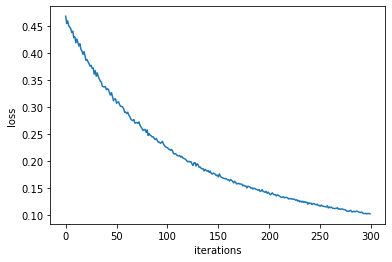

In [18]:
plt.plot(history)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

In [19]:
predictions = list()
labels = list()
for features, label in test_generator:
    predictions.append(linear_model(features, A, b).numpy())
    labels.append(label.numpy()[0])
    
test_loss = xentropy(np.array(labels), np.array(predictions)).numpy()
print(f'Test cross-entropy is {test_loss}')

Test cross-entropy is 0.10245539247989655


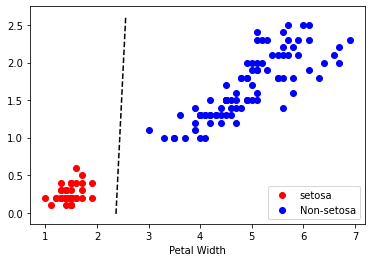

In [21]:
coefficients = np.ravel(A.numpy())
intercept = b.numpy()

for j, (features, label) in enumerate(train_generator):
    setosa_mask = label.numpy() == 1
    setosa = features.numpy()[setosa_mask]
    non_setosa = features.numpy()[~setosa_mask]
    plt.scatter(setosa[:, 0], setosa[:, 1], c='red', label='setosa')
    plt.scatter(non_setosa[:, 0], non_setosa[:, 1], c='blue', label='Non-setosa')
    
    if j == 0:
        plt.legend(loc='lower right')
        
# computing and plotting the decision function
a = -coefficients[0] / coefficients[1]
xx = np.linspace(plt.xlim()[0], plt.xlim()[1], num=10000)
yy = a * xx - intercept / coefficients[1]
on_the_plot = (yy > plt.ylim()[0]) & (yy < plt.ylim()[1])
plt.plot(xx[on_the_plot], yy[on_the_plot], 'k--')

plt.xlabel('Petal Lenght')
plt.xlabel('Petal Width')
plt.show()